결측치(Missing Value)는 말 그대로 데이터에 값이 없는 것을 뜻합니다. 줄여서 'NA'라고 표현하기도 하고, 다른 언어에서는 Null 이란 표현을 많이 씁니다.

Pandas 에서는 결측치를 NaN 값으로 표현합니다.

Pandas에서 isnull() 메서드를 사용하면 DataFrame에서 NaN 값을 확인 할 수 있습니다.

isnull() 메소드는 Dataframe에서 데이터가 NaN 값이면 True로, 그렇지 않으면 False로 값을 리턴합니다.



In [ ]:
import pandas as pd
import numpy as np
# data=pd.read_csv(.csv)
#df.info()
# DataFrame.dropna()
# DataFrame.fillna()

In [ ]:
# df = pd.DataFrame({
#         'name': ['kwon', 'park', 'kim'],
#         'age':[30, np.nan, 19],
#         'class':[np.nan, np.nan, 1]
# })
# print(df.isnull())
# df.isnull()#왜 2개가 다르지? 암튼 조금 다르다 인지
# df.isnull().sum()

    name    age  class
0  False  False   True
1  False   True   True
2  False  False  False


name     0
age      1
class    2
dtype: int64

전처리 eda
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=printfbns&logNo=221593542612

In [ ]:
import sklearn
print(sklearn.__version__)
from sklearn.tree import DecisionTreeClassifier

1.0.1


오늘은 의사결정나무 모델을 설명드리겠습니다. 📣



의사결정나무란? 🤷

결정 트리는 의사 결정 규칙과 그 결과들을 트리 구조로 도식화한 의사 결정 지원 도구의 일종입니다. 즉 스무고개 방식으로 구조화되는 것입니다.


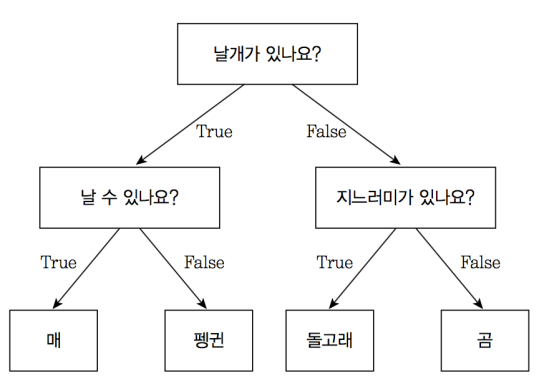


원리를 살펴보겠습니다. 🧑‍🏫



EDA 를 통해 data를 살펴보면 각 행(row) 들은 피쳐들을 갖고 있습니다. 이 중 하나의 피쳐를 정해서 해당 피쳐의 값에 대해 특정한 하나의 값을 정한다면, 이를 기준으로 모든 행(row) 들을 두 개의 노드(node) 로 분류(Binary decision rule. 이진분할) 할 수 있습니다. ✅



만약 특정하게 2️⃣개를 정한다면 3️⃣진분할이 되는 것입니다. 대표적인 의사결정나무인 CART 의사결정 나무 는 이진분할을 사용합니다. 앞으로 CART 의사결정나무에 맞춰 설명을 이어나가겠습니다. 



자 그럼, 🔄 파생된 두 개의 노드에 대해서 또 다시 새로운 피쳐의 특정한 값을 정하고 분류를 진행합니다. 그리고 이 과정을 반복하게 되면 점차 피쳐의 값에 따라 data 들이 분류가 되며 이것이 의사결정 나무의 원리입니다. 🌳



특정한 값을 정하는 의사결정 나무의 대원칙은 ✅ "한쪽 방향으로 쏠리도록" ✅ 입니다. 🙅 분류될 때는 공평하게 비슷한 양으로 나뉘도록 값을 정하는 것이 아니라, 🙆 "한쪽 방향으로 쏠리도록" 해주는 특정한 값을 찾는 것이며, 이를 불순도를 계산해서 찾아냅니다.



의사결정나무 모델은 scikit-learn 에서 모듈을 불러올 수 있습니다.

https://github.com/pyohamen/Im-Being-Data-Scientist/wiki/what-is-decision-tree%3F

In [ ]:
# !wget 'https://bit.ly/3gLj0Q6'# Web GET의 약어로 웹 상의 파일을 다운로드할 때 사용하는 명령어입니다.

# import zipfile
# with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
#     existing_zip.extractall('data')

--2022-01-03 23:41:14--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2022-01-03 23:41:14--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 173.194.211.101, 173.194.211.138, 173.194.211.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qucf6e8446777faq2j3qm9mcolo7klfd/1641253275000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download [following]
--2022-01-03 23:41:15--  https://doc-0c-10-docs.googleusercontent.com/docs/secur

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission (2).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
train = pd.read_csv('train (1).csv') 
test = pd.read_csv('test (1).csv')
submission=pd.read_csv('submission (2).csv')
print(submission.shape)
print(train.shape)
print(test.shape)

(715, 2)
(1459, 11)
(715, 10)


In [ ]:
# test = test.dropna()
# train = train.dropna()

print(train.isnull().sum())
print(test.isnull().sum())
# print(submission.shape)
print(train.shape)
print(test.shape)

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64
id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64
(1459, 11)
(715, 10)


In [ ]:
# test_0 = test.fillna(0)
# print(test_0.shape)
# print(test_0.isnull().sum())#이거 내가 한방법인데 모든것을 다0으로 대체하면 에러가 나느거?

(715, 10)
id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


In [ ]:
test_isna_sum = test.isna().sum()
train_isna_sum = train.isna().sum()
test_isna_sum[test_isna_sum != 0].index
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [ ]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index
train_na_columns = train_isna_sum[train_isna_sum != 0].index

In [ ]:
def fill_bicycle_na(df, column) :
    
    df[column] = df[column].fillna(value = df[column].mean())

In [ ]:
fill_bicycle_na(test, 'hour_bef_precipitation')
fill_bicycle_na(train, 'hour_bef_precipitation')

In [ ]:
for col in test_na_columns:
    
    fill_bicycle_na(test, col)
    
    print(col, '결측값 대체 완료')
for col in train_na_columns:
    
    fill_bicycle_na(train, col)
    
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료
hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())
# print(submission.shape)
print(train.shape)#1328>>1459
print(test.shape)#674>>715

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64
id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64
(1459, 11)
(715, 10)


In [ ]:
X_train = train.drop(['count'], axis=1)# 데이터 분리가 필요함.
Y_train = train['count']
# X_test=test.drop(['count'], axis=1)#test에는 따로 count 없었음.
# Y_test=test['count']
print(X_train.shape)
print(Y_train.shape)

(1459, 10)
(1459,)


In [ ]:
# X_train = train.drop(['제외할컬럼명'], axis=1)
# Y_train = train['예측할컬럼명']
# 이제 모델을 선언하고, fit() 함수를 이용해 모델을 훈련시킬 수 있습니다.
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
pred = model.predict(test)
pred
# pred.size(0)

array([117., 185.,  38.,  37.,  64., 129., 273., 300.,  53., 215., 271.,
       214.,  11.,  36., 214., 159.,  26., 199., 380., 208., 268., 106.,
        18., 107., 168., 119.,  46., 118., 129., 130.,  30.,  30.,  74.,
       137., 278.,  37., 133.,  92., 324.,  39.,  46., 118., 215.,  13.,
       324., 232.,  17.,  74.,  28.,  75., 148.,  86., 191.,  93., 258.,
        51.,  20., 258.,   2.,  19., 106.,  81., 316., 271., 145., 319.,
        10., 304.,   5.,  14.,  95.,  50., 236.,  18., 310., 258.,  34.,
       109., 268.,  13., 252.,  92., 103.,  80., 121., 375.,  74., 154.,
       137., 252., 319., 122.,  74.,  95.,  52.,  75., 117.,  30., 207.,
       138.,  19., 127.,  63., 107.,  39.,  93., 109.,  15., 110., 150.,
       173., 300., 131., 119.,  63., 229., 252.,  50., 258.,  19.,  92.,
       107., 199., 102.,  50., 129.,  46.,  14., 229.,  46., 121., 110.,
        28., 165., 271.,  92.,  44., 118., 310., 425., 267.,  34.,  37.,
        30.,  69., 115., 112., 129., 122., 190., 13

In [ ]:
# from sklearn.metrics import accuracy_score
# print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
#dacon csv 파일에는 y_test 정답지가 없음 

In [ ]:
# pd.DataFrame.to_csv(pred)
df=pd.DataFrame(pred)
df.to_csv('submission.csv')
submission2=pd.read_csv('submission.csv')
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving submission.csv to submission (1).csv


In [ ]:

submission2.shape

(715, 2)